# CIOOS Atlantic Data Catalogue

CKAN https://docs.ckan.org/en/latest/api/index.html

In [57]:
import pandas as pd
from ckanapi import RemoteCKAN

In [27]:
ckan = RemoteCKAN('https://cioosatlantic.ca/ckan/')  # User Agent options available if needed

In [98]:
tags = ckan.action.tag_list()

tag_words = []
for tag in tags:
    tag = tag.lower()
    
    if '_' in tag:
        tag_parts = tag.split('_')
    else:
        tag_parts = tag.split(' ')
    tag_words += tag_parts

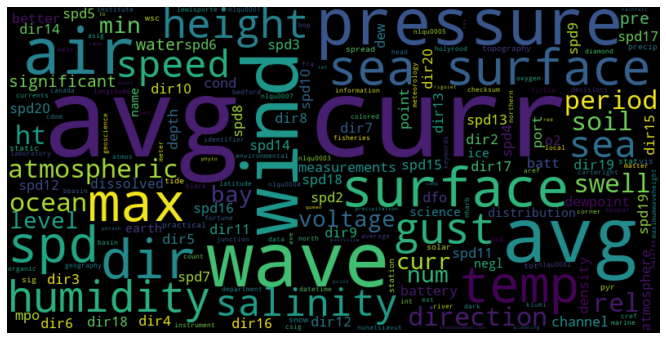

In [117]:
# Generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(tag_words))

wordcloud = WordCloud(width=800, height=400).generate(' '.join(tag_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('tag_cloud.png')
plt.show()

In [215]:
package_list = ckan.action.package_list()

packages = [ckan.action.package_show(id=id) for id in package_list]
packages = pd.DataFrame(packages).set_index('id')

In [218]:
# Remove CIOOS Atlantic WAF, id='655942b6-a2ea-46da-a52b-8aea5a786b9b'
packages = packages.drop(index='655942b6-a2ea-46da-a52b-8aea5a786b9b')

In [220]:
packages.iloc[0]['title_translated']['en']

'Placentia Bay: North Harbour - NHARB'

In [221]:
packages.iloc[0]['notes_translated']['en']

'NHARB (47.84626 N , 54.09684 W) is a water temperature and pressure gauge located in North Harbour, Placentia Bay. The station is equipped with an HydroMet OTT Pressure Level Sensor (PLS) measuring water pressure and temperature. The sensor is connected to a SUTRON Satlink2-V2 which collect 1 min average values (from a 1 Hz internal sampling) logged every 10 min and transmitted via an Omni-directional GOES antenna every hour. The station is installed on a wharf and the sensor is moored at about 3 m depth from mean sea level. This station is part of a monitoring program led by the Northwest Atlantic Fisheries Centre (Fisheries and Oceans, Canada) to provide with an oceanographic baseline of the area.'

In [222]:
packages.iloc[0][['bbox-south-lat', 'bbox-north-lat', 'bbox-west-long', 'bbox-east-long']]

bbox-south-lat     47.83626
bbox-north-lat     47.85626
bbox-west-long    -54.08684
bbox-east-long    -54.10684
Name: 62a3d197-1070-4ada-9ef2-4dbfdaf78944, dtype: object

In [223]:
packages.iloc[0]['spatial']

'{"type": "Polygon", "coordinates": [[[-54.08684, 47.83626], [-54.10684, 47.83626], [-54.10684, 47.85626], [-54.08684, 47.85626], [-54.08684, 47.83626]]]}'

In [247]:
from string import digits

tag = 'Smart Atlantic329'
tag.lower().replace('_', ' ').translate(remove_digits)


'smart atlantic'

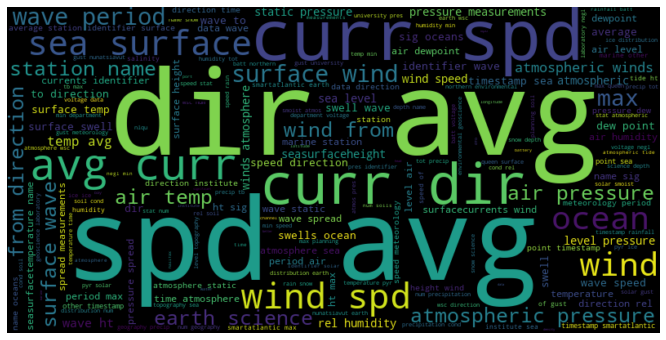

In [266]:
tags = sum([x['en'] for x in packages['keywords'].values], [])
tag_words = [tag.lower().replace('_', ' ').translate(remove_digits) for tag in tags]

wordcloud = WordCloud(max_font_size=144, width=800, height=400).generate(' '.join(tag_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('keyword_cloud.png')
plt.show()

In [198]:
packages.keys()

Index(['notes_translated', 'bbox-east-long', 'license_title', 'maintainer',
       'author', 'relationships_as_object', 'unique-resource-identifier-full',
       'resource-type', 'bbox-north-lat', 'private', 'maintainer_email',
       'num_tags', 'xml_location_url', 'keywords', 'metadata-language',
       'metadata_created', 'title_translated', 'cited-responsible-party',
       'metadata_modified', 'bbox-south-lat', 'author_email',
       'metadata-point-of-contact', 'state', 'spatial', 'progress', 'type',
       'resources', 'creator_user_id', 'num_resources', 'tags',
       'bbox-west-long', 'dataset-reference-date', 'frequency-of-update',
       'groups', 'license_id', 'relationships_as_subject', 'temporal-extent',
       'organization', 'name', 'isopen', 'url', 'notes', 'owner_org', 'extras',
       'license_url', 'eov', 'title', 'revision_id', 'vertical-extent',
       'frequency', 'override_extras', 'clean_tags', 'remote_orgs',
       'organization_mapping', 'config', 'status', '

In [201]:
dict(packages.loc['655942b6-a2ea-46da-a52b-8aea5a786b9b'])

{'notes_translated': nan,
 'bbox-east-long': nan,
 'license_title': nan,
 'maintainer': nan,
 'author': nan,
 'relationships_as_object': [],
 'unique-resource-identifier-full': nan,
 'resource-type': nan,
 'bbox-north-lat': nan,
 'private': False,
 'maintainer_email': nan,
 'num_tags': nan,
 'xml_location_url': nan,
 'keywords': nan,
 'metadata-language': nan,
 'metadata_created': '2020-06-12T12:33:51.202863',
 'title_translated': nan,
 'cited-responsible-party': nan,
 'metadata_modified': '2020-06-12T12:33:51.202871',
 'bbox-south-lat': nan,
 'author_email': nan,
 'metadata-point-of-contact': nan,
 'state': 'active',
 'spatial': nan,
 'progress': nan,
 'type': 'harvest',
 'resources': [],
 'creator_user_id': '8e628c04-4c22-4595-8f80-b9c53355204b',
 'num_resources': nan,
 'tags': [],
 'bbox-west-long': nan,
 'dataset-reference-date': nan,
 'frequency-of-update': nan,
 'groups': [],
 'license_id': nan,
 'relationships_as_subject': [],
 'temporal-extent': nan,
 'organization': {'descript

In [166]:
packages.iloc[0]['keywords']['en']

['Earth Science',
 'battery',
 'department',
 'Atmospheric Pressure',
 'surface',
 'battery_voltage',
 'earth',
 'sutron',
 'fisheries',
 'Atmosphere',
 'ocean',
 'latitude',
 'average',
 'canada',
 'station_name',
 'surface_pressure_avg',
 'dfo',
 'longitude',
 'name',
 'Surface Pressure',
 'oceans',
 'pressure',
 'data',
 'station',
 'surface_temp_avg',
 'temperature',
 'atmosphere',
 'seaSurfaceTemperature',
 'science',
 'atmospheric',
 'dfo-mpo',
 'identifier',
 'nharb',
 'air',
 'surface_air_pressure',
 'time',
 'voltage',
 'other',
 'mpo',
 'timestamp']

In [167]:
packages.iloc[0].tags

[{'vocabulary_id': None,
  'state': 'active',
  'display_name': 'Atmosphere',
  'id': '28081333-8344-4b09-9e1c-e6bdcba20df2',
  'name': 'Atmosphere'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'Atmospheric Pressure',
  'id': '91c58809-183b-4b8d-85a2-ef999d97f115',
  'name': 'Atmospheric Pressure'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'Earth Science',
  'id': '731bcb21-5dba-4fea-a47a-4a203e855d04',
  'name': 'Earth Science'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'Surface Pressure',
  'id': 'e151ff71-d594-4896-9745-e3e9a0eaeb11',
  'name': 'Surface Pressure'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'air',
  'id': '312beb8c-16bc-4e03-9996-c98114854422',
  'name': 'air'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'atmosphere',
  'id': 'eb2a4a07-930a-4ff8-8980-73b674e2a4cf',
  'name': 'atmosphere'},
 {'vocabulary_id': None,
  'state': 'active',
  'display_name': 'atmos

In [137]:
dict(packages.iloc[0])

{'notes_translated': {'fr': "NHARB (47,84626 N, 54,09684 W) est un manom\\u00e8tre de temp\\u00e9rature et de pression de l'eau situ\\u00e9 \\u00e0 North Harbour, dans la baie Placentia. La station est \\u00e9quip\\u00e9e d'un capteur de niveau de pression (PLS) HydroMet OTT qui mesure la pression et la temp\\u00e9rature de l'eau. Le capteur est reli\\u00e9 \\u00e0 un Satlink2-V2 SUTRON qui recueille des valeurs moyennes d'une minute (\\u00e0 partir d'un \\u00e9chantillonnage interne de 1 Hz) enregistr\\u00e9es toutes les 10 minutes et transmises par une antenne GOES omnidirectionnelle toutes les heures. La station est install\\u00e9e sur un quai et le capteur est amarr\\u00e9 \\u00e0 environ 3 m de profondeur du niveau moyen de la mer. Cette station fait partie d'un programme de surveillance dirig\\u00e9 par le Centre des p\\u00eaches de l'Atlantique Nord-Ouest (P\\u00eaches et Oc\\u00e9ans Canada) afin de fournir une base oc\\u00e9anographique de la zone.",
  'en': 'NHARB (47.84626 N

In [121]:
dict(packages.iloc[0])

{'notes_translated': {'fr': "NHARB (47,84626 N, 54,09684 W) est un manom\\u00e8tre de temp\\u00e9rature et de pression de l'eau situ\\u00e9 \\u00e0 North Harbour, dans la baie Placentia. La station est \\u00e9quip\\u00e9e d'un capteur de niveau de pression (PLS) HydroMet OTT qui mesure la pression et la temp\\u00e9rature de l'eau. Le capteur est reli\\u00e9 \\u00e0 un Satlink2-V2 SUTRON qui recueille des valeurs moyennes d'une minute (\\u00e0 partir d'un \\u00e9chantillonnage interne de 1 Hz) enregistr\\u00e9es toutes les 10 minutes et transmises par une antenne GOES omnidirectionnelle toutes les heures. La station est install\\u00e9e sur un quai et le capteur est amarr\\u00e9 \\u00e0 environ 3 m de profondeur du niveau moyen de la mer. Cette station fait partie d'un programme de surveillance dirig\\u00e9 par le Centre des p\\u00eaches de l'Atlantique Nord-Ouest (P\\u00eaches et Oc\\u00e9ans Canada) afin de fournir une base oc\\u00e9anographique de la zone.",
  'en': 'NHARB (47.84626 N

In [88]:
packages.title

id
62a3d197-1070-4ada-9ef2-4dbfdaf78944                 Placentia Bay: North Harbour - NHARB
a8ba88cb-b70b-42fa-8bae-98c97cfe5049                          Halifax (Herring Cove) Buoy
406628c6-7699-40ee-8b68-46862e7e9076                NEGL, Rigolet, Nunatsiavut (NLQU0002)
955e4fc4-e0aa-4734-a121-1faf2569b4cf                                         Manolis Buoy
dd254f78-b13f-4ed4-a21a-b4326ac8bde5                        Channel-Port Aux Basques Buoy
e7a30dd2-454b-4b93-89dd-89b511653a75                           Head of Placentia Bay Buoy
483d0a21-ee62-4baf-a6f8-d063ad2dadda                Placentia Bay: Ragged Islands - KLUMI
704c2f16-f093-448c-b2db-fa77ca66a596    Diamond Jubilee Cruise Ship Terminal Meteorolo...
b1cb3c17-5548-4d3f-8c7b-828a9a783c9c              NEGL, Postville, Nunatsiavut (NLQU0001)
c7b63e04-3a3b-4b5a-91a5-a7a3388cdff3                                   Bonavista Bay Buoy
d325d3ac-9fa8-41cf-8e8a-193859a05bf8      Potash Terminal Tide and Meteorological Station
8fa887e

In [73]:
organizations = ckan.action.organization_list(all_fields=True)
organizations = pd.DataFrame(organizations).set_index('id')
organizations

,display_name,description,image_display_url,package_count,created,name,is_organization,state,image_url,type,title,revision_id,num_followers,approval_status
id,,,,,,,,,,,,,,
189140ed-bc3c-410c-abfb-ae877ead64df,smartatlantic,,,32,2020-06-12T09:21:05.423903,smartatlantic,True,active,,organization,,c310575c-07ae-4b70-b638-f65d19f1a620,0,approved
ab872f33-5375-42cb-a5df-252570ebf5de,fisheries-and-oceans-canada,,,1,2020-06-12T09:23:51.432892,fisheries-and-oceans-canada,True,active,,organization,,0059de07-0da5-4c90-aba5-eb5e2835fe5d,0,approved
c705c72b-1d3c-4a60-b3fd-c09724baa0bb,ceotr,,,1,2020-06-12T09:30:25.907262,ceotr,True,active,,organization,,4fee8769-a60d-46f1-88c4-0f809b81fb6d,0,approved


In [74]:
users = ckan.action.user_list()
users_df = pd.DataFrame(users).set_index('id')
users_df

,email_hash,about,display_name,name,created,sysadmin,activity_streams_email_notifications,state,number_of_edits,fullname,number_created_packages
id,,,,,,,,,,,
a9952719-af67-4ae9-a5e0-26778acd6668,d41d8cd98f00b204e9800998ecf8427e,None,default,default,2020-06-12T08:43:03.111863,True,False,active,34,None,34
2ab437b5-129b-4a4a-ac9f-7de8df3e13e5,af9f73e8b5443986572f1ffe7f1046c3,None,Jeff Cullis,jcullis,2019-11-26T12:31:24.409584,True,False,active,0,Jeff Cullis,0
8e628c04-4c22-4595-8f80-b9c53355204b,b53baa675f1abe0b3f1de8701c4a2a46,None,jthomp,jthomp,2020-06-12T08:44:21.140649,True,False,active,7,None,1
77224b8d-bffa-478c-963a-1893c7df2f54,4503919a6b983e44fc16e6b279cff95e,,Odum Idika,oidika,2019-11-29T11:05:13.643623,True,False,active,0,Odum Idika,0
f997956e-4417-4c4f-a21c-c01335aa9eec,7e32bc12b8dbbacb514f11bafe69bc65,None,Scott Bruce,scottbruce,2019-11-26T12:31:24.409584,True,False,active,0,Scott Bruce,0
